**Loading Libraries**

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly
import plotly.express as px
%matplotlib inline

In [3]:
import sklearn.discriminant_analysis
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

**Mounting Google Drive**

In [4]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [5]:
train = pd.read_csv('C:/Users/quynh/Downloads/Petrophysical Logs.csv', sep=';')

In [6]:
train

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
0,15/9-13,494.5280,437641.96875,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,NaN,1.611410,...,34.636410,NaN,NaN,-0.574928,NaN,NaN,NaN,NaN,65000,1.0
1,15/9-13,494.6800,437641.96875,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,NaN,1.618070,...,34.636410,NaN,NaN,-0.570188,NaN,NaN,NaN,NaN,65000,1.0
2,15/9-13,494.8320,437641.96875,6470972.5,-469.805786,NORDLAND GP.,NaN,19.468800,NaN,1.626459,...,34.779556,NaN,NaN,-0.574245,NaN,NaN,NaN,NaN,65000,1.0
3,15/9-13,494.9840,437641.96875,6470972.5,-469.957794,NORDLAND GP.,NaN,19.459282,NaN,1.621594,...,39.965164,NaN,NaN,-0.586315,NaN,NaN,NaN,NaN,65000,1.0
4,15/9-13,495.1360,437641.96875,6470972.5,-470.109772,NORDLAND GP.,NaN,19.453100,NaN,1.602679,...,57.483765,NaN,NaN,-0.597914,NaN,NaN,NaN,NaN,65000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170506,7/1-2 S,3169.3124,NaN,NaN,NaN,VESTLAND GP.,Bryne Fm.,8.423170,NaN,NaN,...,27.674368,NaN,NaN,-0.001763,NaN,NaN,26.673708,NaN,30000,2.0
1170507,7/1-2 S,3169.4644,NaN,NaN,NaN,VESTLAND GP.,Bryne Fm.,8.379244,NaN,NaN,...,28.024338,NaN,NaN,-0.007600,NaN,NaN,26.840818,NaN,65030,2.0
1170508,7/1-2 S,3169.6164,NaN,NaN,NaN,VESTLAND GP.,Bryne Fm.,8.350248,NaN,NaN,...,28.091282,NaN,NaN,-0.018297,NaN,NaN,27.007942,NaN,65030,2.0
1170509,7/1-2 S,3169.7684,NaN,NaN,NaN,VESTLAND GP.,Bryne Fm.,8.313779,NaN,NaN,...,28.019775,NaN,NaN,-0.011438,NaN,NaN,27.175179,NaN,65030,2.0


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1170511 entries, 0 to 1170510
Data columns (total 29 columns):
 #   Column                             Non-Null Count    Dtype  
---  ------                             --------------    -----  
 0   WELL                               1170511 non-null  object 
 1   DEPTH_MD                           1170511 non-null  float64
 2   X_LOC                              1159736 non-null  float64
 3   Y_LOC                              1159736 non-null  float64
 4   Z_LOC                              1159736 non-null  float64
 5   GROUP                              1169233 non-null  object 
 6   FORMATION                          1033517 non-null  object 
 7   CALI                               1082634 non-null  float64
 8   RSHA                               630650 non-null   float64
 9   RMED                               1131518 non-null  float64
 10  RDEP                               1159496 non-null  float64
 11  RHOB                    

In [8]:
train.columns

Index(['WELL', 'DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'GROUP', 'FORMATION',
       'CALI', 'RSHA', 'RMED', 'RDEP', 'RHOB', 'GR', 'SGR', 'NPHI', 'PEF',
       'DTC', 'SP', 'BS', 'ROP', 'DTS', 'DCAL', 'DRHO', 'MUDWEIGHT', 'RMIC',
       'ROPA', 'RXO', 'FORCE_2020_LITHOFACIES_LITHOLOGY',
       'FORCE_2020_LITHOFACIES_CONFIDENCE'],
      dtype='object')

In [9]:
print('\nNumber of wells: {}\n'.format(len(train.WELL.unique())))


Number of wells: 98



In [10]:
print('\nNumber of types of Lithologies: {}\n'.format(len(train.FORCE_2020_LITHOFACIES_LITHOLOGY.unique())))


Number of types of Lithologies: 12



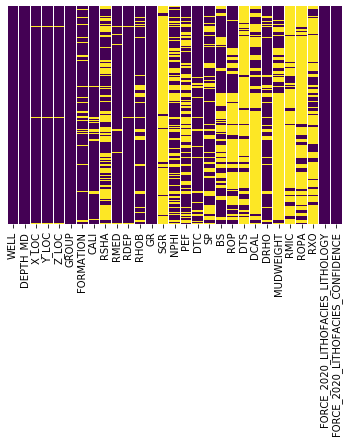

In [11]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Check percentage of missing data points

In [12]:
drop_col = []
for i in train.columns: 
    percent_missing = (train[i].isnull().sum())/ len(train[i])
    print(i, percent_missing)
    if percent_missing > 0.75: 
        drop_col.append(i)

WELL 0.0
DEPTH_MD 0.0
X_LOC 0.00920538123947575
Y_LOC 0.00920538123947575
Z_LOC 0.00920538123947575
GROUP 0.0010918308328584695
FORMATION 0.1170377723917161
CALI 0.07507575751103578
RSHA 0.4612182200765307
RMED 0.0333128009903367
RDEP 0.009410419893533679
RHOB 0.13777657792195033
GR 0.0
SGR 0.9407498092713353
NPHI 0.34608987015072906
PEF 0.4261549015771744
DTC 0.06908350284619282
SP 0.26164982644332263
BS 0.4167871980699028
ROP 0.5428740097273754
DTS 0.8508232729124289
DCAL 0.744698682882946
DRHO 0.156046376326237
MUDWEIGHT 0.729903435337216
RMIC 0.8495016279214804
ROPA 0.8356914202429537
RXO 0.7202700359073942
FORCE_2020_LITHOFACIES_LITHOLOGY 0.0
FORCE_2020_LITHOFACIES_CONFIDENCE 0.00015292466281820503


In [13]:
drop_col

['SGR', 'DTS', 'RMIC', 'ROPA']

In [14]:
train.drop(drop_col, axis = 1, inplace = True)

In [15]:
#!pip install cegaltools

In [16]:
## 12 classes
train['FORCE_2020_LITHOFACIES_LITHOLOGY'].unique()

array([65000, 30000, 65030, 70000, 99000, 80000, 86000, 74000, 70032,
       90000, 88000, 93000], dtype=int64)

In [17]:
train['FORCE_2020_LITHOFACIES_CONFIDENCE'].unique()

array([ 1.,  3.,  2., nan])

In [18]:
train['FORMATION'] = train['FORMATION'].fillna('')
train['GROUP'] = train['GROUP'].fillna('')

### KMeans clustering

In [19]:
### Since LDA assumes the normality of the data, transform it into normal dist. data with mean = 0, variance =1
scaler = StandardScaler()
lda = LDA()
lb_make = LabelEncoder()

In [20]:
## transform categorical/nonnumerical data to numerical with label encoder 
train['WELL_ID'] = lb_make.fit_transform(train['WELL'])
train['GROUP_ID'] = lb_make.fit_transform(train['GROUP'])
train['FORMATION'] = lb_make.fit_transform(train['FORMATION'])

In [21]:
train.drop(['WELL','GROUP','FORMATION'], axis = 1, inplace = True)

In [22]:
train = train.interpolate(method='linear', limit_direction='forward', axis=1)

In [23]:
data = train.copy()

In [24]:
train.drop(['FORCE_2020_LITHOFACIES_LITHOLOGY', 'FORCE_2020_LITHOFACIES_CONFIDENCE'], axis=1, inplace = True)

In [25]:
null_data = train[train.isnull().any(axis=1)]
null_data

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,GR,...,DTC,SP,BS,ROP,DCAL,DRHO,MUDWEIGHT,RXO,WELL_ID,GROUP_ID


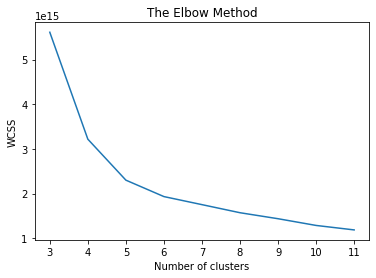

In [26]:
wcss = []
for i in range(3,12):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(train)
    wcss.append(kmeans.inertia_)
plt.plot(range(3,12),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow.png')
plt.show()

In [27]:
final_model = KMeans(n_clusters=5, random_state=5, max_iter=100, n_init=100)
final_model.fit(train)
data_w_clusters = data.copy()
data_w_clusters['Cluster'] = pd.Series(final_model.labels_, index=train.index)

### Count and percentage of each clusters in Kmeans compared to true data labels

In [28]:
lithology_dict = {30000: 'Sandstone',
65030: 'Sandstone/Shale',
65000: 'Shale',
80000: 'Marl',
74000: 'Dolomite',
70000: 'Limestone',
70032: 'Chalk',
88000: 'Halite',
86000: 'Anhydrite',
99000: 'Tuff',
90000: 'Coal',
93000: 'Basement'}

In [29]:
data['FORCE_2020_LITHOFACIES_LITHOLOGY'] = data['FORCE_2020_LITHOFACIES_LITHOLOGY'].map(lithology_dict)

In [30]:
dict_true = {}
for i in data['FORCE_2020_LITHOFACIES_LITHOLOGY'].unique(): 
    dict_true[f'{i}'] = data[data['FORCE_2020_LITHOFACIES_LITHOLOGY'] == i].shape[0]
dict_true

{'Shale': 720803,
 'Sandstone': 168937,
 'Sandstone/Shale': 150455,
 'Limestone': 56320,
 'Tuff': 15245,
 'Marl': 33329,
 'Anhydrite': 1085,
 'Dolomite': 1688,
 'Chalk': 10513,
 'Coal': 3820,
 'Halite': 8213,
 'Basement': 103}

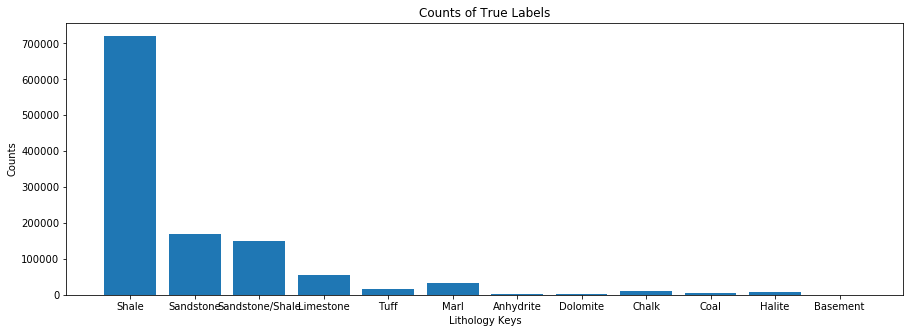

In [31]:
counts_keys = dict_true.keys()
counts_values = dict_true.values()
plt.figure(figsize = (15,5))
plt.bar(counts_keys,counts_values)
plt.title('Counts of True Labels')
plt.xlabel('Lithology Keys')
plt.ylabel('Counts')
plt.show()

In [32]:
sum(counts_values)

1170511

In [33]:
percent = {}
for i in counts_keys:
    percent[i] = dict_true[i]/sum(counts_values) * 100
percent    

{'Shale': 61.58019873371544,
 'Sandstone': 14.432756291910115,
 'Sandstone/Shale': 12.853787790119018,
 'Limestone': 4.81157374855939,
 'Tuff': 1.302422617130467,
 'Marl': 2.8473888754569585,
 'Anhydrite': 0.09269455818868853,
 'Dolomite': 0.14421052002074308,
 'Chalk': 0.8981547375462511,
 'Coal': 0.32635319104220295,
 'Halite': 0.7016593607407363,
 'Basement': 0.0087995755699861}

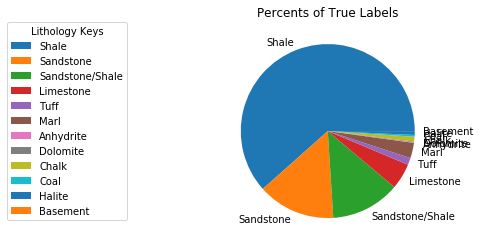

In [34]:
percents_keys = percent.keys()
percents_values = percent.values()
plt.pie(percents_values, labels=percents_keys)
plt.title('Percents of True Labels')
plt.legend(loc='upper right', title='Lithology Keys',bbox_to_anchor=(-0.4,1.025))
plt.show()

In [35]:
data_w_clusters

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,GR,...,ROP,DCAL,DRHO,MUDWEIGHT,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE,WELL_ID,GROUP_ID,Cluster
0,494.5280,437641.968750,6.470972e+06,-469.501831,19.480835,10.546122,1.611410,1.798681,1.884186,80.200851,...,34.636410,17.030741,-0.574928,21666.283382,43333.141691,65000.0,1.0,0.0,7.0,0
1,494.6800,437641.968750,6.470972e+06,-469.653809,19.468800,10.543435,1.618070,1.795641,1.889794,79.262886,...,34.636410,17.033111,-0.570188,21666.286541,43333.143271,65000.0,1.0,0.0,7.0,0
2,494.8320,437641.968750,6.470972e+06,-469.805786,19.468800,10.547629,1.626459,1.800733,1.896523,74.821999,...,34.779556,17.102656,-0.574245,21666.283837,43333.141918,65000.0,1.0,0.0,7.0,0
3,494.9840,437641.968750,6.470972e+06,-469.957794,19.459282,10.540438,1.621594,1.801517,1.891913,72.878922,...,39.965164,19.689424,-0.586315,21666.275790,43333.137895,65000.0,1.0,0.0,7.0,0
4,495.1360,437641.968750,6.470972e+06,-470.109772,19.453100,10.527890,1.602679,1.795299,1.880034,71.729141,...,57.483765,28.442926,-0.597914,21666.268058,43333.134029,65000.0,1.0,0.0,7.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170506,3169.3124,2379.090093,1.588868e+03,798.645478,8.423170,6.949373,5.475577,4.001780,2.527984,77.654900,...,27.674368,13.836302,-0.001763,9999.998824,19999.999412,30000.0,2.0,97.0,12.0,1
1170507,3169.4644,2379.193111,1.588922e+03,798.650533,8.379244,6.918836,5.458428,3.998021,2.537613,75.363937,...,28.024338,14.008369,-0.007600,21676.661600,43353.330800,65030.0,2.0,97.0,12.0,1
1170508,3169.6164,2379.299862,1.588983e+03,798.666786,8.350248,6.885651,5.421054,3.956457,2.491860,66.452843,...,28.091282,14.036493,-0.018297,21676.654469,43353.327234,65030.0,2.0,97.0,12.0,1
1170509,3169.7684,2379.404745,1.589041e+03,798.677434,8.313779,6.847219,5.380659,3.914099,2.447539,55.784817,...,28.019775,14.004169,-0.011438,21676.659042,43353.329521,65030.0,2.0,97.0,12.0,1


In [36]:
def ClusterIndicesNumpy(clustNum, labels_array): 
    return np.where(labels_array == clustNum)[0]
def ClusterCompbyCount(arr): 
    l2 = [] 
    for i in range(len(arr)): 
        l2.append(data_w_clusters.iloc[[arr[i]]]['FORCE_2020_LITHOFACIES_LITHOLOGY'].item())
    l2 = pd.Series(l2)
    return(l2.value_counts())

In [37]:
ClusterIndicesNumpy(0, data_w_clusters['Cluster'])

array([      0,       1,       2, ..., 1170500, 1170501, 1170502],
      dtype=int64)

In [38]:

list_df = [] 
#print(df1)
for i in range(5): 
    arr = ClusterIndicesNumpy(i, data_w_clusters['Cluster'])
    list_df.append(ClusterCompbyCount(arr).to_frame(name = f'Cluster {i}'))
result = pd.concat(list_df, axis = 1)
result #Cluster composition by count 

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4
30000.0,27357,1013.0,60599.0,50905.0,29063.0
65000.0,134528,2360.0,249269.0,150416.0,184230.0
65030.0,12299,1002.0,54229.0,19930.0,62995.0
70000.0,18435,12.0,11621.0,20383.0,5869.0
70032.0,9258,1143.0,NaN,112.0,NaN
74000.0,608,6.0,318.0,313.0,443.0
80000.0,8657,663.0,8923.0,12097.0,2989.0
86000.0,798,282.0,NaN,NaN,5.0
88000.0,3919,4294.0,NaN,NaN,NaN
90000.0,58,NaN,1228.0,1849.0,685.0


In [39]:
result['lithology key'] = result.index.to_series().map(lithology_dict)
result.index = result['lithology key']

In [40]:
result.drop(['lithology key'], axis = 1, inplace = True)

In [41]:
result = result.fillna(0)

In [42]:
result

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4
lithology key,,,,,
Sandstone,27357,1013.0,60599.0,50905.0,29063.0
Shale,134528,2360.0,249269.0,150416.0,184230.0
Sandstone/Shale,12299,1002.0,54229.0,19930.0,62995.0
Limestone,18435,12.0,11621.0,20383.0,5869.0
Chalk,9258,1143.0,0.0,112.0,0.0
Dolomite,608,6.0,318.0,313.0,443.0
Marl,8657,663.0,8923.0,12097.0,2989.0
Anhydrite,798,282.0,0.0,0.0,5.0
Halite,3919,4294.0,0.0,0.0,0.0


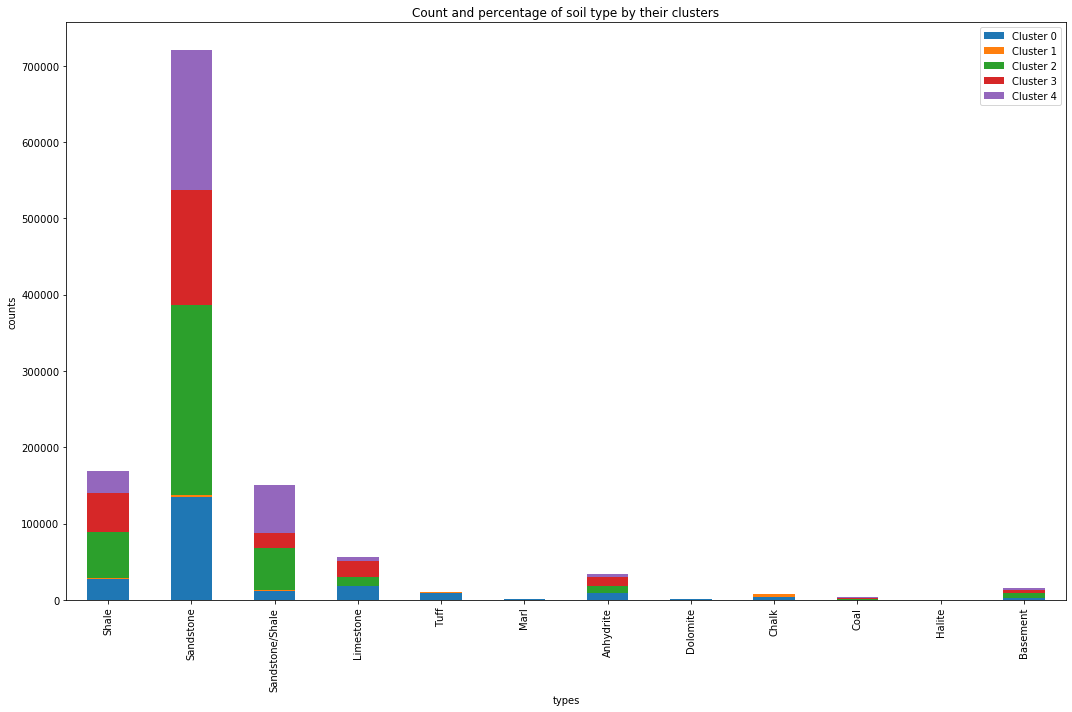

In [42]:
cols = data['FORCE_2020_LITHOFACIES_LITHOLOGY'].unique()
ax = result.plot(kind='bar', stacked=True, figsize=(15, 10))
arr = np.arange(len(cols))
plt.xticks(arr,cols,rotation='vertical')
plt.xlabel('types')
plt.ylabel('counts')
plt.title('Count and percentage of soil type by their clusters')
plt.tight_layout()
plt.show()

In [43]:
train.head()

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,GR,...,DTC,SP,BS,ROP,DCAL,DRHO,MUDWEIGHT,RXO,WELL_ID,GROUP_ID
0,494.528,437641.96875,6470972.5,-469.501831,19.480835,10.546122,1.611410,1.798681,1.884186,80.200851,...,161.131180,24.612379,29.624394,34.636410,17.030741,-0.574928,21666.283382,43333.141691,0.0,7.0
1,494.680,437641.96875,6470972.5,-469.653809,19.468800,10.543435,1.618070,1.795641,1.889794,79.262886,...,160.603470,23.895531,29.265970,34.636410,17.033111,-0.570188,21666.286541,43333.143271,0.0,7.0
2,494.832,437641.96875,6470972.5,-469.805786,19.468800,10.547629,1.626459,1.800733,1.896523,74.821999,...,160.173615,23.916357,29.347957,34.779556,17.102656,-0.574245,21666.283837,43333.141918,0.0,7.0
3,494.984,437641.96875,6470972.5,-469.957794,19.459282,10.540438,1.621594,1.801517,1.891913,72.878922,...,160.149429,23.793688,31.879426,39.965164,19.689424,-0.586315,21666.275790,43333.137895,0.0,7.0
4,495.136,437641.96875,6470972.5,-470.109772,19.453100,10.527890,1.602679,1.795299,1.880034,71.729141,...,160.128342,24.104078,40.793921,57.483765,28.442926,-0.597914,21666.268058,43333.134029,0.0,7.0


In [46]:
neigh = NearestNeighbors(n_neighbors=22)
nbrs = neigh.fit(train)
distances, indices = nbrs.kneighbors(train)
distances = np.sort(distances, axis=0)
distances = distances[:,1]

(0, 50)

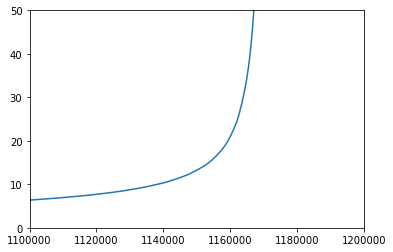

In [63]:
plt.plot(distances)
plt.xlim((1100000,1200000))
plt.ylim((0,50))

In [90]:
dbscan = DBSCAN(eps =15, min_samples=140).fit(train)

In [96]:
np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6], dtype=int64)

In [92]:
data_w_clusters_2 = data.copy()
data_w_clusters_2['Cluster'] = pd.Series(dbscan.labels_, index=train.index)

In [93]:
data_w_clusters_2

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,GR,...,ROP,DCAL,DRHO,MUDWEIGHT,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE,WELL_ID,GROUP_ID,Cluster
0,494.5280,437641.968750,6.470972e+06,-469.501831,19.480835,10.546122,1.611410,1.798681,1.884186,80.200851,...,34.636410,17.030741,-0.574928,21666.283382,43333.141691,Shale,1.0,0.0,7.0,-1
1,494.6800,437641.968750,6.470972e+06,-469.653809,19.468800,10.543435,1.618070,1.795641,1.889794,79.262886,...,34.636410,17.033111,-0.570188,21666.286541,43333.143271,Shale,1.0,0.0,7.0,-1
2,494.8320,437641.968750,6.470972e+06,-469.805786,19.468800,10.547629,1.626459,1.800733,1.896523,74.821999,...,34.779556,17.102656,-0.574245,21666.283837,43333.141918,Shale,1.0,0.0,7.0,-1
3,494.9840,437641.968750,6.470972e+06,-469.957794,19.459282,10.540438,1.621594,1.801517,1.891913,72.878922,...,39.965164,19.689424,-0.586315,21666.275790,43333.137895,Shale,1.0,0.0,7.0,-1
4,495.1360,437641.968750,6.470972e+06,-470.109772,19.453100,10.527890,1.602679,1.795299,1.880034,71.729141,...,57.483765,28.442926,-0.597914,21666.268058,43333.134029,Shale,1.0,0.0,7.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170506,3169.3124,2379.090093,1.588868e+03,798.645478,8.423170,6.949373,5.475577,4.001780,2.527984,77.654900,...,27.674368,13.836302,-0.001763,9999.998824,19999.999412,Sandstone,2.0,97.0,12.0,-1
1170507,3169.4644,2379.193111,1.588922e+03,798.650533,8.379244,6.918836,5.458428,3.998021,2.537613,75.363937,...,28.024338,14.008369,-0.007600,21676.661600,43353.330800,Sandstone/Shale,2.0,97.0,12.0,-1
1170508,3169.6164,2379.299862,1.588983e+03,798.666786,8.350248,6.885651,5.421054,3.956457,2.491860,66.452843,...,28.091282,14.036493,-0.018297,21676.654469,43353.327234,Sandstone/Shale,2.0,97.0,12.0,-1
1170509,3169.7684,2379.404745,1.589041e+03,798.677434,8.313779,6.847219,5.380659,3.914099,2.447539,55.784817,...,28.019775,14.004169,-0.011438,21676.659042,43353.329521,Sandstone/Shale,2.0,97.0,12.0,-1


In [103]:
list_df = [] 
for i in range(7): 
    arr = ClusterIndicesNumpy(i, data_w_clusters_2['Cluster'])
    list_df.append(ClusterCompbyCount(arr).to_frame(name = f'Cluster {i}'))
result2 = pd.concat(list_df, axis = 1)
result2 #Cluster composition by count 

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6
30000.0,NaN,NaN,NaN,NaN,NaN,NaN,162.0
65030.0,NaN,NaN,NaN,NaN,NaN,293.0,NaN
70032.0,207.0,452.0,155.0,NaN,NaN,NaN,NaN
88000.0,NaN,NaN,NaN,144.0,3769.0,NaN,NaN


In [104]:
result2['lithology key'] = result2.index.to_series().map(lithology_dict)
result2.index = result2['lithology key']
result2.drop(['lithology key'], axis = 1, inplace = True)
result2 = result2.fillna(0)
result2

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6
lithology key,,,,,,,
Sandstone,0.0,0.0,0.0,0.0,0.0,0.0,162.0
Sandstone/Shale,0.0,0.0,0.0,0.0,0.0,293.0,0.0
Chalk,207.0,452.0,155.0,0.0,0.0,0.0,0.0
Halite,0.0,0.0,0.0,144.0,3769.0,0.0,0.0


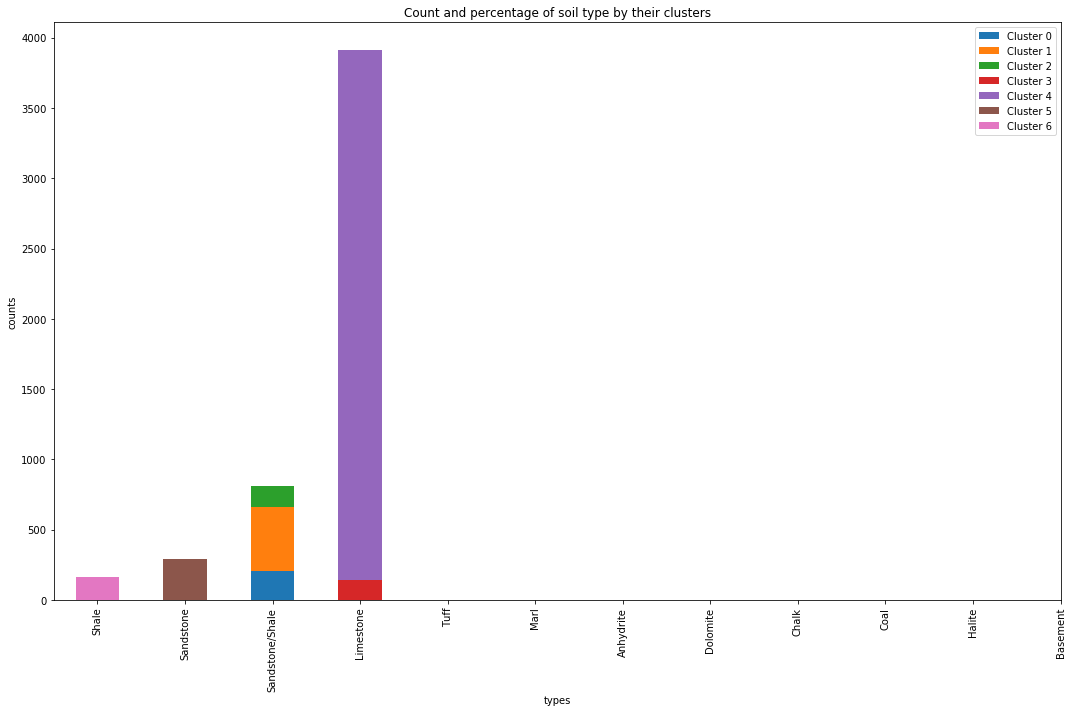

In [105]:
cols = data['FORCE_2020_LITHOFACIES_LITHOLOGY'].unique()
ax = result2.plot(kind='bar', stacked=True, figsize=(15, 10))
arr = np.arange(len(cols))
plt.xticks(arr,cols,rotation='vertical')
plt.xlabel('types')
plt.ylabel('counts')
plt.title('Count and percentage of soil type by their clusters')
plt.tight_layout()
plt.show()